# Dublin House Prices by Post Code
## Part 4 - Breaking Down the Data
We collected and cleaned the Property Price Register house price data in Part 1. In Part 2, we created a Google API object to help us find eirKeys for the addresses, and we then used a Naive Bayes machine learning algorithm to fill as many empty eirKey fields as we could. Now, it's time to examine the data and see what's been going on in the Dublin Housing market so far in 2016.

In [1]:
import pandas as pd
import bokeh.charts as bc
import bokeh.plotting as bp
import pickle

In [2]:
with open('../library/pickle/prices_final_dublin_2016_2015_pickle', 'r') as f:
    houses = pickle.load(f)
houses.describe()

,Lat,Lon,Price
count,21552.000000,21552.000000,2.452500e+04
mean,53.343354,-6.269275,3.754464e+05
std,0.060286,0.088922,5.605328e+05
min,53.193504,-6.503346,5.500000e+03
25%,53.295176,-6.323950,2.025000e+05
50%,53.340296,-6.262626,2.885400e+05
75%,53.378569,-6.208126,4.300000e+05
max,53.626983,-6.052932,6.408506e+07


### Dublin House Prices

/Users/anthonymunnelly/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


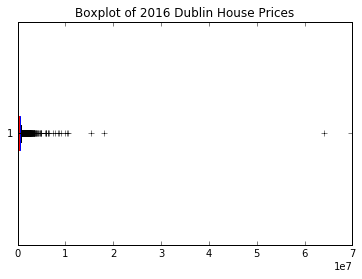

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.boxplot(houses.Price.values, vert=False)
plt.title('Boxplot of 2016 Dublin House Prices')

We can see that there is one price here that is more than a little bigger than the rest.

In [4]:
houses[houses.Price == houses.Price.max()]

,Address,Date,Description,FullMarketPrice,Lat,Lon,Price,Size,VAT,eirKey,eirKeyName
13326,"Westpark, Tallaght, Dublin 24, Ireland",2016-01-15,New Dwelling house /Apartment,No,53.287019,-6.364894,64085057.0,greater than or equal to 38 sq metres and less...,Yes,D24,Tallaght


In [6]:
print "This costs €{:,.2f}.".format(houses[houses.Price == houses.Price.max()]['Price'].loc[13326]) 

This costs €64,085,057.00.


Sixty-four million Euro is a considerable chunk of change for "a" house. Again, as we said in Part 1, the sparse descriptions of the properties in the dataset don't always help us understand what's there.

We'll exclude this value from the dataset and carry on.

In [7]:
houses = houses[houses.Price < houses.Price.max()].copy()
houses.Price.describe()

count    2.452400e+04
mean     3.728485e+05
std      3.856015e+05
min      5.500000e+03
25%      2.025000e+05
50%      2.885398e+05
75%      4.300000e+05
max      1.815000e+07
Name: Price, dtype: float64

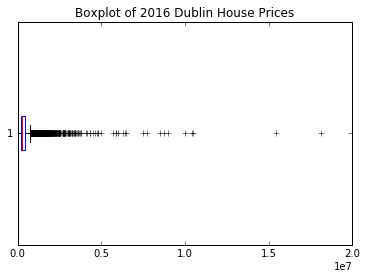

In [8]:
plt.boxplot(houses.Price.values, vert=False)
plt.title('Boxplot of 2016 Dublin House Prices')

### The Ten Most Expensive Houses

In [9]:
houses[['Address', 'Date', 'Description', 'Price', 'Size', 'eirKey']].sort_values('Price', ascending = False).head(10)

,Address,Date,Description,Price,Size,eirKey
16225,"1 Coldcut Cres, Coldcut, Dublin 22, Ireland",2016-08-31,Second-Hand Dwelling house /Apartment,18150000.00,,D20
21715,"KYLEMORE CLINIC, 49 CHURCH ROAD, BALLYBRACK",2016-04-07,Second-Hand Dwelling house /Apartment,15450000.00,,A96
14032,"Johnstown Rd, Cabinteely, Co. Dublin, Ireland",2016-03-10,Second-Hand Dwelling house /Apartment,10500000.00,,A96
20759,"Rathfarnham, Dublin, Ireland",2015-11-03,Second-Hand Dwelling house /Apartment,10400000.00,,D14
23759,"SORRENTO HOUSE, 1 SORRENTO TERRACE, SORRENTO ROAD",2015-08-31,Second-Hand Dwelling house /Apartment,10000000.00,,glugger
21063,"Kenah Hill, St George's Ave, Rocheshill, Killi...",2015-11-27,Second-Hand Dwelling house /Apartment,9000000.00,,A96
14782,"19 Temple Rd, Dublin, Ireland",2016-05-18,Second-Hand Dwelling house /Apartment,8725000.00,,D06
21861,"APARTMENTS 1-21, BROADSTONE HALL, PHIBSBORO ROAD",2016-06-02,Second-Hand Dwelling house /Apartment,8500000.00,,glugger
19175,"12, West Park Gate, Bóthar an tSeanbhábhúin, T...",2015-06-15,New Dwelling house /Apartment,7743017.58,greater than or equal to 38 sq metres and less...,D24
17607,"Strathmore Rd, Dublin, Ireland",2015-02-04,Second-Hand Dwelling house /Apartment,7500000.00,,A96


### The Ten Least Expensive Houses

In [10]:
houses[['Address', 'Date', 'Description', 'Price', 'Size', 'eirKey']].sort_values('Price').head(10)

,Address,Date,Description,Price,Size,eirKey
12832,"19 Aranleigh Mount, Rathfarnham, Dublin 14, D1...",2015-12-14,Second-Hand Dwelling house /Apartment,5500.0,,D14
17859,"Chapelizod, Dublin, Ireland",2015-02-26,Second-Hand Dwelling house /Apartment,5675.0,,D10
6474,"53 Ringsend Rd, Dublin 4, D04 C2V5, Ireland",2015-01-07,Second-Hand Dwelling house /Apartment,6000.0,,D04
9104,"1 Pembroke Park, Dublin 4, D04 HD74, Ireland",2015-06-12,Second-Hand Dwelling house /Apartment,6000.0,,D04
8972,"1 Pembroke Park, Dublin 4, D04 HD74, Ireland",2015-06-05,Second-Hand Dwelling house /Apartment,6000.0,,D04
5374,"2 Ashton Cl, Ballyroan, Dublin 16, D16 T0C6, I...",2016-09-29,Second-Hand Dwelling house /Apartment,6500.0,,D16
5381,"2A Ashton Cl, Ballyroan, Dublin 16, D16 C672, ...",2016-09-29,Second-Hand Dwelling house /Apartment,6500.0,,D16
21365,"Keady Galleon, Stillorgan Park, Stillorgan, Du...",2015-12-17,Second-Hand Dwelling house /Apartment,8500.0,,A94
20475,"1 Chapelizod Hill Rd, Chapelizod, Dublin 20, I...",2015-10-09,Second-Hand Dwelling house /Apartment,8890.0,,D10
98,"1 Strand Rd, Dublin 4, D04 W9K6, Ireland",2016-01-12,Second-Hand Dwelling house /Apartment,9000.0,,D04


### Houses Sold by eirKeyName
Let's look at a boxplot of house prices broken down by eirKey. We'll only include those postal areas for which we have one hundred or more data points.

In [11]:
houses.eirKeyName.value_counts()

Castleknock      2019
Tallaght         1347
Blackrock        1226
Crumlin          1173
Killiney         1162
Sutton           1121
Swords           1109
Ballsbridge      1080
Ballinteer       1076
Foxrock          1058
Finglas           992
Rathmines         984
Cabra             971
Drumcondra        952
Churchtown        917
Malahide          852
Clontarf          835
Lucan             830
Dolphins Barn     805
Raheny            666
Clondalkin        538
D01               528
Balbriggan        509
Ballyfermot       259
D02               235
Skerries          228
Palmerstown       167
Rush              154
Lusk              137
Coolock           108
Bray               41
Garristown          8
Oldtown Court       8
Dunboyne            2
Ballyboughal        1
Name: eirKeyName, dtype: int64

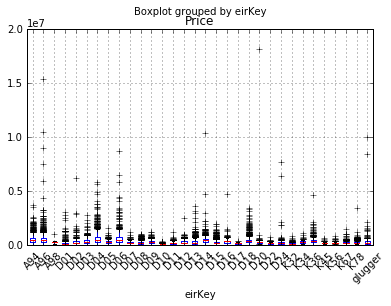

In [12]:
houses_list = list(houses.eirKey.value_counts().keys())
eirKeyBoxplotData = houses[houses['eirKey'].isin(houses_list[:-5])]
eirKeyBoxplotData.boxplot('Price', 'eirKey', rot=45)

### Removing More Outliers
Again, we see house prices here that are so large they are crushing the distribution visibility of the others. Therefore, we'll cap our house prices at five million Euro or less, and look again.

In [13]:
bc.output_notebook()
eirKeyBoxplotData = eirKeyBoxplotData[eirKeyBoxplotData.Price < 10000000]
price_v_postcode_boxplot = bc.BoxPlot(eirKeyBoxplotData,
                                      values='Price',
                                      label='eirKeyName',
                                     color = 'skyblue',
                                     whisker_color = 'navy',
                                     marker = 'diamond',
                                     legend = False)

price_v_postcode_boxplot.width = 800
from bokeh.models import NumeralTickFormatter
price_v_postcode_boxplot._yaxis.formatter = NumeralTickFormatter(format = ("€0,000 a"))
price_v_postcode_boxplot.title.text = 'Price v Post Code, 2016-to-Date'
bc.show(price_v_postcode_boxplot)

Loading BokehJS ...

### Conclusions
The boxplot is the most eloquent of all the graphs that show data, because it shows the most information in the least amount of space. From one single boxplot we can clearly see:
1. Although the most houses sold - for which we have data - are in Dublin 15/Castleknock, these are by no means the most expensive.
2. Although the spread of house prices is clearly different for every post code, it is possible to pay well over the odds in any postcode. Every single boxplot above shows outlier data, and that's after capping the value of the houses at five million Euro.
3. The least-expensive place to buy a house in 2016 is Dublin 10/Ballyfermot. It's also got the smallest inter-quantile range of all the postal areas. The most expensive house in Dublin 10 just about makes it to the first quartile of house prices in Dublin 4.

### When Were the Houses Sold?
It is remarkable that so many houses are being sold in Dublin 15. If we look at house sales broken down by date and by postal area, can we see if there is any pattern there?

In [14]:
from bokeh.models import DatetimeTickFormatter, HoverTool

bp.output_notebook()

timeplot = bp.figure(width = 1000, height = 800)

colors = ['red', 'orange', 'purple', 'green', 'blue', 'black', 'coral']

pcs = houses.groupby('eirKeyName')
counter = 0
current_source = {}
renderer = {}
for pc, details in pcs:
    plot_from_zero = pd.DataFrame([0, 0])
    temp = details.copy()
    temp = temp[['Date', 'Address']]
    temp = temp.set_index('Date')
    temp = temp.resample('W').count()
    
    current_source = bp.ColumnDataSource(data = {"pc":[pc],
                                                    "sales":temp.Address.values})
    
    renderer[pc] = timeplot.line(temp.index,
                                 temp.Address.cumsum(),
                                 legend = pc,
                                 color = colors[counter],
                                 alpha = 0.25,
                                 line_width = 2,
                                 hover_alpha = 1,
                                hover_color = colors[counter])
    
    myTooltips = """
                <div>
                    <span style="font-size: 17px; font-weight: bold; color: {}">{}</span>
                </div>
                """
    
    timeplot.add_tools(HoverTool(tooltips = myTooltips.format(colors[counter], pc),
                                renderers = [renderer[pc]],
                                mode = 'mouse'))
    
    
    if counter == 6:
        counter = 0
    else:
        counter += 1
        
timeplot.title.text = "Count of Sales over Time"
# timeplot.xaxis.formatter = DatetimeTickFormatter(formats =dict(hours=["%H:%M"],
#                                                                 days=["%b %d"],
#                                                                 months=["%b '%y"],
#                                                                 years=["%b %Y"]))
timeplot.xaxis.formatter = DatetimeTickFormatter()

bp.show(timeplot)

Loading BokehJS ...

### Mapping the Houses Sold
All to come in [Part 5]().